# DSCI-235-Project

Baseball is known for its plethora of data to be analyzed within the game. At the center of that is Statcast. A tracking system that collects data on several data points during a Major League Baseball game. The data set I chose for this project is a publically accessable Statcast data set from every pitch during April of the 2021 MLB season. The data include over 100,000 rows with over 35 variables describing the data. These variabes range from how fast each pitch was thrown to how fast the ball was hit off the bat, if it was hit on that pitch. The reason I chose only April was to create a smaller sample size tp analyze but still have a large sample size to look at. A description of all variables I will use can be found at: https://baseballsavant.mlb.com/csv-docs

------
Questions I intend to answer with this data set.
1. Which team has the highest/lowest average fastball pitch speed from their pitchers?
2. Which team has the highest/lowest average hit speed from their hitters?
3. Which team has "unluckiest" hitters? 
4. Do right handed or left handed batters get shifted upon more often? 
5. Do teams tend to score more runs while playing at home or away?




In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%autosave 60

Autosaving every 60 seconds


In [144]:
df = pd.read_csv('https://raw.githubusercontent.com/mattboyd27/DSCI-235-Project/main/baseball.csv')
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_y,release_pos_z,events,description,stand,p_throws,...,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,babip_value,post_away_score,post_home_score,if_fielding_alignment,of_fielding_alignment,delta_home_win_exp,delta_run_exp
0,FF,4/5/2021,93.2,0.84,0.84,5.74,strikeout,swinging_strike,L,L,...,NaN,NaN,0.0,0.0,2,0,Infield shift,Standard,-0.014,-0.134
1,SL,4/5/2021,82.9,1.03,1.03,5.69,NaN,foul,L,L,...,NaN,NaN,NaN,NaN,2,0,Infield shift,Standard,0.000,0.000
2,FF,4/5/2021,94.6,-1.85,-1.85,5.77,caught_stealing_3b,ball,R,R,...,NaN,NaN,0.0,0.0,4,0,Standard,Standard,0.014,-0.261
3,FF,4/5/2021,93.6,0.60,0.60,5.85,NaN,ball,L,L,...,NaN,NaN,NaN,NaN,2,0,Infield shift,Standard,0.000,0.043
4,FF,4/5/2021,97.1,1.86,1.86,6.57,field_out,hit_into_play,R,L,...,0.277,0.261,0.0,0.0,6,0,Standard,Standard,-0.007,-0.264


## Question 1: Which team has the highest/lowest average fastball pitch speed from their pitchers?

In the dataset, we have home and away team and what inning the pitch is thrown in. We can determine the team the pitcher is on from these variables. If the pitch is thrown in the top of the inning, the home teams pitcher is throwing the ball. If the ball is thrown in the bottom of an inning, the away team pitcher is throwing. To find the average fastball, we need to use the pitch type  column. However, there are different kinds of fastballs labeled 'FF', 'SI', and 'FA'. I will relabel all pitches to be easier to understand.

In [57]:
from numpy.lib.arraysetops import unique
unique(df['pitch_type'])

array(['CH', 'CS', 'CU', 'EP', 'FA', 'FC', 'FF', 'FS', 'KC', 'KN', 'SC',
       'SI', 'SL'], dtype=object)

In [84]:
# Create new column for pitcher team
df['pitcher_team'] = np.where(df['inning_topbot'] == 'Top', df['home_team'], df['away_team'])

df['pitch_type1'] = np.where((df['pitch_type'] == 'FF') | (df['pitch_type'] == 'SI') | (df['pitch_type'] == 'FA'), 'Fastball',
                            np.where((df['pitch_type'] == 'CH'), 'Changeup',
                                     np.where((df['pitch_type'] == 'CS') | (df['pitch_type'] == 'CU') | (df['pitch_type'] == 'SC') | 
                                              (df['pitch_type'] == 'KC'), 'Curveball',
                                              np.where((df['pitch_type'] == 'EP'), 'Eephus',
                                                       np.where((df['pitch_type'] == 'KN'), 'Knuckleball',
                                                                np.where((df['pitch_type'] == 'SL'), 'Slider', 
                                                                         np.where((df['pitch_type'] == 'FS'), 'Splitter',"Unidentified")))))))
# Group by each team
df[df['pitch_type1'] == "Fastball"].groupby(['pitch_type1','pitcher_team'])['release_speed'].mean().sort_values(ascending = False)


pitch_type1  pitcher_team
Fastball     NYM             94.779428
             ATL             94.463407
             LAD             94.409120
             BOS             94.319521
             NYY             94.311111
             CWS             94.237370
             PHI             93.998306
             COL             93.973893
             CIN             93.925943
             KC              93.868627
             DET             93.802600
             SD              93.739551
             MIA             93.650157
             TOR             93.456610
             PIT             93.137967
             MIL             93.103651
             STL             93.052944
             BAL             93.005495
             TB              92.982931
             TEX             92.970280
             CLE             92.936467
             WSH             92.724106
             OAK             92.584056
             ARI             92.483449
             SEA             92.426044

## Question 2: Which team has the highest/lowest average hit speed from their hitters?

To separate each hitter into their own team, I need to create a new column for each hitter. If a hitter is hitting in the top of an inning, they are the away team. If they are hitting in the bottom of an inning, they are on the home team.

In [85]:
# Create new column for hitter team
df['hitter_team'] = np.where(df['inning_topbot'] == 'Top', df['away_team'], df['home_team'])

# Group by each team
df.groupby('hitter_team')['launch_speed'].mean().sort_values(ascending = False)

hitter_team
MIN    83.691920
ATL    83.606096
TOR    83.191023
NYY    83.124752
WSH    83.022604
TB     82.743816
CLE    82.721934
OAK    82.462111
HOU    82.408929
CIN    82.396150
ARI    82.394603
STL    82.362447
LAD    82.289560
SD     82.255511
BOS    82.210061
LAA    82.158879
PHI    82.136861
NYM    82.112630
CHC    81.985980
TEX    81.841681
BAL    81.831526
KC     81.746562
CWS    81.706773
SF     81.642477
DET    81.616877
MIL    81.507293
MIA    81.461102
PIT    81.142321
COL    81.049285
SEA    80.944983
Name: launch_speed, dtype: float64

## Question 3: Which team has "unluckiest" hitters?

Text(0, 0.5, 'Launch Angle (Degrees)')

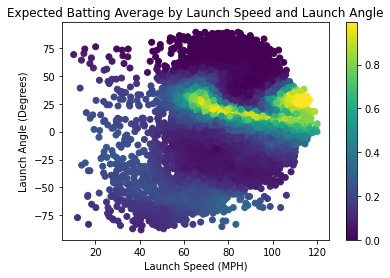

In [96]:
plt.scatter(df['launch_speed'], df['launch_angle'], c=df['estimated_ba_using_speedangle'])
plt.colorbar()
plt.title("Expected Batting Average by Launch Speed and Launch Angle")
plt.xlabel("Launch Speed (MPH)")
plt.ylabel("Launch Angle (Degrees)")

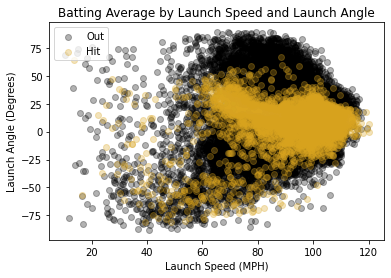

In [176]:
hit = df[df['babip_value'] == 1]
out = df[df['babip_value'] == 0]
plt.scatter(out['launch_speed'], out['launch_angle'], label = "Out", alpha = 0.3, color = "black")
plt.scatter(hit['launch_speed'], hit['launch_angle'], label = "Hit", alpha = 0.3, color = "goldenrod")
plt.title("Batting Average by Launch Speed and Launch Angle")
plt.xlabel("Launch Speed (MPH)")
plt.ylabel("Launch Angle (Degrees)")
plt.legend(loc="upper left");